# TLDR: Macro Avg. F1 = 72%

# Default Setup

In [1]:
# Dataloading Stuff
from google.colab import drive
from sys import path
import os

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas pyss3
from sklearn.model_selection import train_test_split

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span

import numpy as np
import pandas as pd

drive.mount('/content/drive', force_remount=True)
path_root = '/content/drive/My Drive/NLP Lab/SingleLabel/'
path.append(path_root)
data_root = 'data/'

     |████████████████████████████████| 2.0MB 12.6MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load Data

In [2]:
X_train, y_train = Dataset.load_from_files(path_root + data_root + "TutorialTopicClassification/train", folder_label=False)
X_val, y_val = Dataset.load_from_files(path_root + data_root + "TutorialTopicClassification/test", folder_label=False)

Loading 'sports' documents: 100%|██████████| 8/8 [00:03<00:00,  2.42it/s]


## Classify

Classification: 100%|██████████| 800/800 [00:01<00:00, 457.04it/s]



                    precision    recall  f1-score   support

   art&photography       0.66      0.90      0.76       100
    beauty&fashion       0.77      0.71      0.74       100
  business&finance       0.76      0.73      0.74       100
              food       0.73      0.27      0.39       100
            health       0.55      0.81      0.65       100
             music       0.86      0.76      0.81       100
science&technology       0.65      0.76      0.70       100
            sports       0.98      0.83      0.90       100

          accuracy                           0.72       800
         macro avg       0.74      0.72      0.71       800
      weighted avg       0.74      0.72      0.71       800


 Accuracy: 0.721

[ updating evaluations cache ]


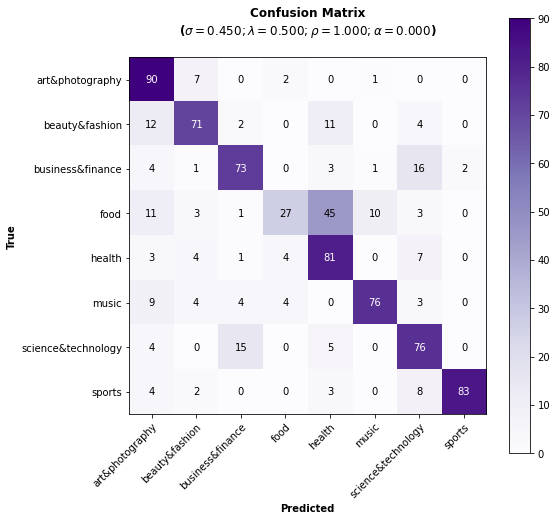

0.72125

In [3]:
clf = SS3()
clf.fit(X_train, y_train, n_grams=5)
Evaluation.clear_cache()
Evaluation.test(clf, X_val, y_val)